This notebook loads our previously cleaned data, adds a GeoHash for unique point identification and exports it as a Parquet with a datetime index

In [1]:
from matplotlib import pyplot as plt
from darts.models.forecasting.rnn_model import RNNModel
from darts.timeseries import TimeSeries
import pandas as pd 
import numpy as np 

RES_PATH = '../../res/'

In [2]:
df = pd.read_parquet(RES_PATH + 'water_temp_2.parquet')
print(df.columns)
df.head()

Index(['month', 'lon', 'lat', 'water_temp_2', 'year', 'geohash', 'date'], dtype='object')


,month,lon,lat,water_temp_2,year,geohash,date
0,0,-61.067473,11.480469,26.813548,2000,ddh963u,2000-01-01
1,1,-61.067473,11.480469,26.564828,2000,ddh963u,2000-02-01
2,2,-61.067473,11.480469,26.395613,2000,ddh963u,2000-03-01
3,3,-61.067473,11.480469,26.656900,2000,ddh963u,2000-04-01
4,4,-61.067473,11.480469,27.514286,2000,ddh963u,2000-05-01


In [3]:
df_pixel = df.pivot_table(index='date', columns='geohash', values='water_temp_2').reset_index(drop=False, level=0)
df_pixel = df_pixel.rename_axis(None, axis=1).set_index('date')

In [4]:
df_pixel = df_pixel.interpolate().bfill().reset_index()
df_pixel

,date,dd55xcg,dd55zb7,dd55zyg,dd57673,dd5775k,dd577gq,dd5789v,dd5793z,dd57b8m,...,dek0nuv,dek0psz,dek0q57,dek0qgm,dek0rer,dek0s3z,dek0t3c,dek20sf,dek21ku,dek24hy
0,2000-01-01,26.693710,26.681581,26.681581,26.697742,26.697742,26.705161,26.695484,26.695484,26.681581,...,25.968710,25.964258,25.968710,25.968710,25.964258,25.942129,25.942129,25.964258,25.972548,25.972548
1,2000-02-01,25.859448,25.944000,25.944000,26.149759,26.149759,26.252552,25.964828,25.964828,26.083759,...,25.358448,25.331931,25.358448,25.358448,25.331931,25.431379,25.431379,25.331931,25.314241,25.314241
2,2000-03-01,26.409710,26.386871,26.386871,26.402806,26.402806,26.351032,26.422097,26.422097,26.392419,...,25.351323,25.350419,25.351323,25.351323,25.350419,25.374355,25.374355,25.350419,25.373452,25.373452
3,2000-04-01,26.154400,26.174433,26.174433,26.218167,26.218167,26.272400,26.174733,26.174733,26.208933,...,25.711767,25.723167,25.711767,25.711767,25.723167,25.668800,25.668800,25.723167,25.727833,25.727833
4,2000-05-01,27.341000,27.334821,27.334821,27.352821,27.352821,27.344679,27.344750,27.344750,27.341036,...,26.791679,26.775036,26.791679,26.791679,26.775036,26.759036,26.759036,26.775036,26.742393,26.742393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2021-08-01,28.520673,28.508060,28.502827,28.473581,28.473581,28.474948,28.504988,28.504988,28.492681,...,28.249871,28.219347,28.238536,28.238536,28.215145,28.247669,28.247669,28.219347,28.215585,28.215585
253,2021-09-01,29.502483,29.512058,29.514946,29.547113,29.547113,29.562113,29.527667,29.527667,29.525075,...,28.947792,28.936350,28.942262,28.942262,28.932296,28.951779,28.951779,28.936350,28.931233,28.931233
254,2021-10-01,29.050641,29.066544,29.073988,29.035073,29.035073,29.043976,29.041125,29.041125,29.049347,...,28.791468,28.777169,28.799161,28.799161,28.784798,28.794141,28.794141,28.777169,28.776589,28.776589
255,2021-11-01,28.353279,28.353088,28.354104,28.348962,28.348962,28.330375,28.346600,28.346600,28.345608,...,28.272375,28.267017,28.272987,28.272987,28.263292,28.295513,28.295513,28.267017,28.256642,28.256642


In [5]:
len(df_pixel.columns), len(df_pixel.dropna(axis=1, how='any').columns)

(15369, 15369)

<AxesSubplot:xlabel='date'>

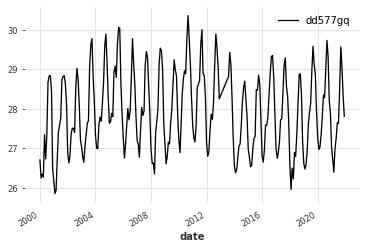

In [6]:
df_pixel[['dd577gq', 'date']].set_index('date').plot()

In [7]:
ts = TimeSeries.from_dataframe(df_pixel, time_col='date', value_cols=list(df.geohash.unique()), freq='MS')
ts

<TimeSeries (DataArray) (date: 264, component: 15368, sample: 1)>
array([[[26.81354839],
        [26.81354839],
        [26.82264516],
        ...,
        [26.76371782],
        [26.76371782],
        [26.76371782]],

       [[26.56482759],
        [26.56482759],
        [26.54065517],
        ...,
        [26.76371782],
        [26.76371782],
        [26.76371782]],

       [[26.3956129 ],
        [26.3956129 ],
        [26.38716129],
        ...,
...
        ...,
        [28.98485887],
        [28.98485887],
        [28.98485887]],

       [[28.2538375 ],
        [28.2538375 ],
        [28.23517083],
        ...,
        [28.30789167],
        [28.30789167],
        [28.30789167]],

       [[27.59083333],
        [27.59083333],
        [27.5782125 ],
        ...,
        [27.29678333],
        [27.29678333],
        [27.29678333]]])
Coordinates:
  * date       (date) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
  * component  (component) object 'ddh963u' 'ddh971y' ... 'de3b7eq' 'de3bke2'
Dimensions without coordinates: sample

In [ ]:
df_pixel.to_parquet(RES_PATH + 'df_pixel.parquet')